#0. Librerías y configuración

Importamos librerias estandar  para la ciencia de datos, mara manejo de dats, para ghraficar con matplotlib y seaborn, tambien incluimos modulos de sklearn para el preprosesamiento de la data, nos da modelos clasicos, metricas y split de datos. por ultimo tensorflow y keras para los MLP

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score
)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (8, 4)
pd.set_option("display.max_colwidth", 120)

RANDOM_STATE = 42

# 1. Carga de datos

Cargamos el CSV del proyecto, el cual corresponde al hospital del pino

In [200]:
df = pd.read_csv("dataset_elpino.csv", sep=";", low_memory=False)

df.shape

(14561, 68)

# 2. Vista general del dataset

* Primero revisamos con un info al df los tipos de datos y vemos que todo esta como object excepto la edad, ademas validamos si es que hay datos en NaN


In [201]:
print("\n=== Info general ===")
df.info()


=== Info general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Diag 01 Principal (cod+des)     14561 non-null  object
 1   Diag 02 Secundario (cod+des)    14561 non-null  object
 2   Diag 03 Secundario (cod+des)    14561 non-null  object
 3   Diag 04 Secundario (cod+des)    14561 non-null  object
 4   Diag 05 Secundario (cod+des)    14561 non-null  object
 5   Diag 06 Secundario (cod+des)    14561 non-null  object
 6   Diag 07 Secundario (cod+des)    14561 non-null  object
 7   Diag 08 Secundario (cod+des)    14561 non-null  object
 8   Diag 09 Secundario (cod+des)    14561 non-null  object
 9   Diag 10 Secundario (cod+des)    14561 non-null  object
 10  Diag 11 Secundario (cod+des)    14561 non-null  object
 11  Diag 12 Secundario (cod+des)    14561 non-null  object
 12  Diag 13 Secundario (cod+

* con un head visualizamos las primeras filas del df, vemos que hay muchas columnas dentro que son agnosticas


In [202]:
df.head()

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 24 Secundario (cod+des),Proced 25 Secundario (cod+des),Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada, en enfermedades clasificadas en otra parte",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] como causa de enfermedades clasificadas en otros capítulos,L89.9 - Úlcera de decúbito y area de presión no especificadas,"L08.9 - Infección local de la piel y del tejido subcutáneo, no especificada",B96.2 - Escherichia coli [E. coli] como causa de enfermedades clasificadas en otros capítulos,A41.5 - Sepsis por otros organnismos Gram negativos,J86.9 - Piotórax sin fístula,...,99.84 - AISLAMIENTO,88.72 - ECOCARDIOGRAFIA,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR.OTRO,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR.CULTIVO Y SENSIBILIDAD,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tipo I (hipoxémica)",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO Y SENSIBILIDAD,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR.OTRO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR.CULTIVO,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR.OTRO,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON TRAQUEOSTOMÍA W/MCC
2,K56.5 - Adherencias [bridas] intestinales con obstrucción,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del adulto,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio espectro,B95.6 - Staphylococcus aureus como causa de enfermedades clasificadas en otros capítulos,B96.8 - Otros agentes bacterianos especificados como causa de enfermedades clasificadas en otros capítulos,B37.1 - Candidiasis pulmonar,...,99.84 - AISLAMIENTO,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA.CULTIVO Y SENSIBILIDAD,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y SENSIBILIDAD,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURGICOS,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON TRAQUEOSTOMÍA W/MCC
3,K76.8 - Otras enfermedades especificadas del hígado,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,"J44.9 - Enfermedad pulmonar obstructiva crónica, no especificada",R41.0 - Desorientación no especificada,...,57.94 - SONDAJE URINARIO PERMANENTE,00.13 - INYECCION NESIRITIDE,00.17 - INFUSON AGENTE VASOPRESOR,99.04 - TRANSFUSION CONCENTRADO HEMATIES,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.23 - INYECCION ESTEROIDE,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC
4,"T81.0 - Hemorragia y hematoma que complican un procedimiento, no clasificados en otra parte","Y83.2 - Operación quirúrgica con anastomosis, derivación o injerto",S31.1 - 

### Detección de filas duplicadas exactas

*  contamos los duplicados de cada fila

In [203]:
dup_count = df.duplicated().sum()
print(f"\nFilas duplicadas exactas: {dup_count} ({dup_count/len(df):.2%} del total)")


Filas duplicadas exactas: 144 (0.99% del total)


# 3. Calidad de datos (nulos + placeholders)

### 3.1. Nulos formales (NaN)

muestra que no hay casi NaN, porque los vacíos están codificados de otra forma.

In [204]:
null_ratio = df.isna().mean().sort_values(ascending=False)
print("\n=== Porcentaje de nulos por columna ===")
print((null_ratio.head(10) * 100).round(2))


=== Porcentaje de nulos por columna ===
Diag 01 Principal (cod+des)     0.0
Diag 02 Secundario (cod+des)    0.0
Diag 03 Secundario (cod+des)    0.0
Diag 04 Secundario (cod+des)    0.0
Diag 05 Secundario (cod+des)    0.0
Diag 06 Secundario (cod+des)    0.0
Diag 07 Secundario (cod+des)    0.0
Diag 08 Secundario (cod+des)    0.0
Diag 09 Secundario (cod+des)    0.0
Diag 10 Secundario (cod+des)    0.0
dtype: float64


### 3.2. Columnas de diagnósticos y procedimientos

Identifica todas las columnas de diagnósticos y todas las de procedimientos.

In [205]:
diag_cols = [c for c in df.columns if c.startswith("Diag ")]
proc_cols = [c for c in df.columns if c.startswith("Proced ")]

print("\nN° columnas diagnóstico:", len(diag_cols))
print("N° columnas procedimiento:", len(proc_cols))


N° columnas diagnóstico: 35
N° columnas procedimiento: 30



#### Muchos diagnósticos/procedimientos vacíos vienen como "-"

In [206]:
print("\nEjemplo de valores en Diag 20 y Proced 20:")
for col in ["Diag 20 Secundario (cod+des)", "Proced 20 Secundario (cod+des)"]:
    print(f"\n{col}")
    print(df[col].value_counts().head(5))


Ejemplo de valores en Diag 20 y Proced 20:

Diag 20 Secundario (cod+des)
Diag 20 Secundario (cod+des)
-                                                                                                     14132
Z92.2 - Historia personal de uso (presente) de otros medicamentos por largo tiempo                       31
Z92.4 - Historia personal de cirugía mayor, no clasificada en otra parte                                 21
F17.2 - Trastornos mentales y del comportamiento debidos al uso de tabaco, síndrome de dependencia       11
I10 - Hipertensión esencial (primaria)                                                                   11
Name: count, dtype: int64

Proced 20 Secundario (cod+des)
Proced 20 Secundario (cod+des)
-                                      11913
93.19 - EJERCICIO FISIOTERAPIA NCOC      132
93.99 - TERAPIA RESPIRATORIA.OTRA        130
93.82 - TERAPIA EDUCATIVA                128
89.7 - EXAMEN FISICO GENERAL             124
Name: count, dtype: int64


# 4. Variable objetivo: GRD

##### Separamos código y descripción en columnas aparte, esto con el fin de modelar bien coin un label limpio, solo teniendo el codigo del grd y el desc sirve para explicar en un lenguaje universal en vez de un valor numerico para las maquinas

In [207]:
df["GRD_COD"] = df["GRD"].str.split(" - ", n=1, expand=True)[0]
df["GRD_DESC"] = df["GRD"].str.split(" - ", n=1, expand=True)[1]

print("\nN° de GRD distintos:", df["GRD"].nunique())


N° de GRD distintos: 526


vamos a medir que tan desbalanceado esta el problema. determinandop si hay muchos GRD con pocos casos y pocos GRD con muchisimos pacientes. permitiendonos ver:

* Top-10 GRD  30–40% de los casos.

* Top-50 GRD  70–80%.

In [208]:


grd_counts = df["GRD"].value_counts()
print("\nTop 15 GRD más frecuentes:")
print(grd_counts.head(15))



Top 15 GRD más frecuentes:
GRD
146101 - PH CESÁREA                                                                            813
146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO ESTERILIZACIÓN Y/O DILATACIÓN Y LEGRADO         639
146131 - PH PARTO VAGINAL                                                                      538
158171 - MH NEONATO, PESO AL NACER >2499 GR SIN PROCEDIMIENTO MAYOR                            389
134161 - MH TRASTORNOS DEL ANTEPARTO                                                           325
071141 - PH COLECISTECTOMÍA LAPAROSCÓPICA                                                      317
044153 - MH INFECCIONES E INFLAMACIONES RESPIRATORIAS W/MCC                                    287
061131 - PH PROCEDIMIENTOS SOBRE APÉNDICE                                                      252
041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC                            248
146102 - PH CESÁREA W/CC                                                     

#### Cobertura de los GRD más frecuentes (para justificar TOP-N luego)

In [209]:
def coverage(k):
    return grd_counts.head(k).sum() / len(df)

In [210]:
print("\nCobertura de GRD más frecuentes:")
for k in [10, 20, 50, 100]:
    print(f"Top-{k}: {coverage(k):.1%} de los episodios")


Cobertura de GRD más frecuentes:
Top-10: 27.8% de los episodios
Top-20: 40.3% de los episodios
Top-50: 59.7% de los episodios
Top-100: 76.0% de los episodios


### Gráfico: distribución top-20 GRD

El problema es fuertemente desbalanceado
Para el primer modelo, se decide restringirse a los GRD , mas frecuentes, por quie ahi estya la mayor vcarga de volumen y costoi

/tmp/ipython-input-796924488.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


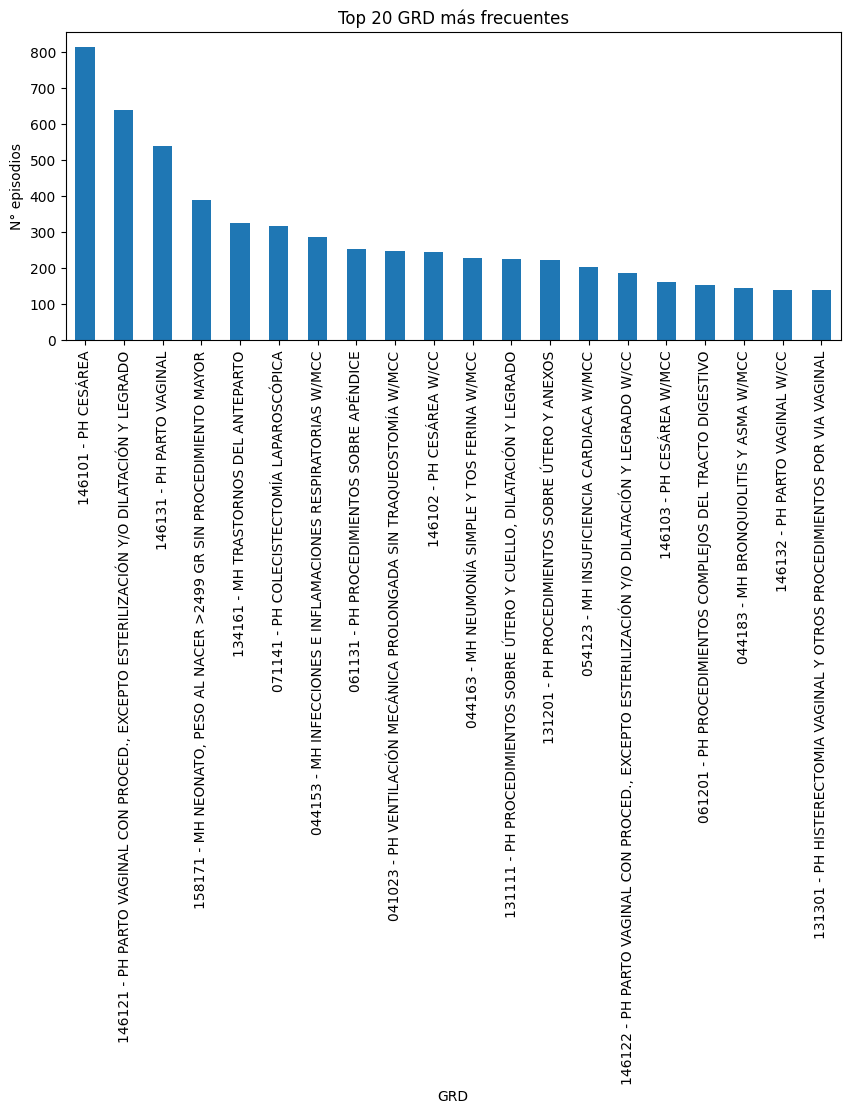

In [211]:
top_n = 20
plt.figure(figsize=(10, 4))
grd_counts.head(top_n).plot(kind="bar")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} GRD más frecuentes")
plt.ylabel("N° episodios")
plt.tight_layout()
plt.show()

# 5. Variables demográficas: Edad y Sexo

nos permite describir el dataset de la siguiente forma ejempo:

* Describe edad Chequea edades >100 como posibles outliers, pero médicamente posibles.

* El 60% de los episodios corresponde a mujeres, lo que se explica por alta carga de GRD obstétricos.

In [212]:
print("\n=== Estadísticos de Edad en años ===")
print(df["Edad en años"].describe())



=== Estadísticos de Edad en años ===
count    14561.000000
mean        39.426550
std         24.681545
min          0.000000
25%         23.000000
50%         36.000000
75%         60.000000
max        121.000000
Name: Edad en años, dtype: float64


In [213]:

print("\nDistribución Sexo:")
print(df["Sexo (Desc)"].value_counts())


Distribución Sexo:
Sexo (Desc)
Mujer     9617
Hombre    4944
Name: count, dtype: int64


#### ¿Hay edades raras?

In [214]:
outliers_edad = df[df["Edad en años"] > 100]["Edad en años"].value_counts()
print("\nEdades > 100 años (posibles outliers, pero clínicamente posibles):")
print(outliers_edad)


Edades > 100 años (posibles outliers, pero clínicamente posibles):
Edad en años
121    1
101    1
Name: count, dtype: int64


### Histograma de edad

Histograma de edad, se ve mezcla de recién nacidos, mujeres en edad fértil, adultos mayores.

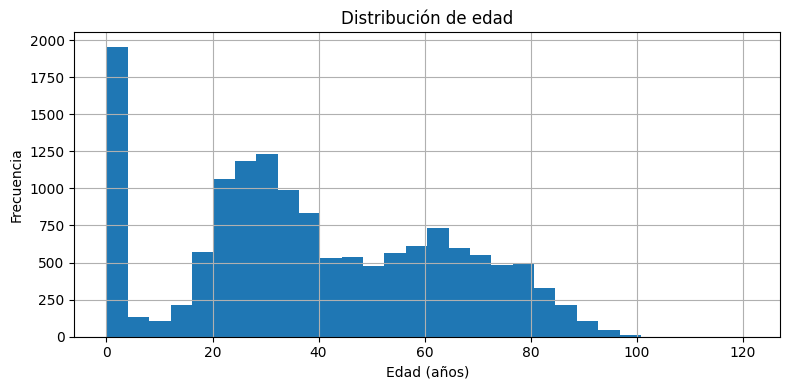

In [215]:
df["Edad en años"].hist(bins=30)
plt.title("Distribución de edad")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### Distribución de sexo

cuenta y grafica proporción Hombre/Mujer más mujeres, coherente con obstetricia alta.

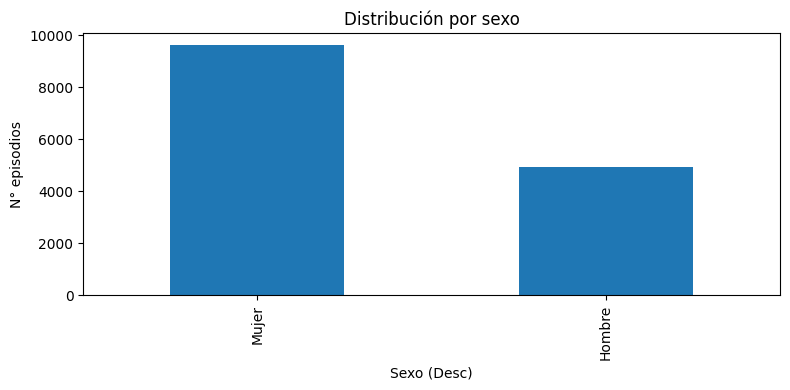

In [216]:
df["Sexo (Desc)"].value_counts().plot(kind="bar")
plt.title("Distribución por sexo")
plt.ylabel("N° episodios")
plt.tight_layout()
plt.show()

# 6. Diagnósticos y procedimientos

### Código y descripción del diagnóstico principal

Identificar cuáles son las patologías y procedimientos más frecuentes. lo que nos permite ver lo siguente:
* Cuáles códigos CIE-10 Diag1_cod van a tener más peso en el modelo.

* Cómo se alinean los diagnósticos frecuentes con los GRD frecuentes:

     *  Los GRD de cesárea se asocian a diagnósticos CIE relacionados a embarazo/poarto

In [217]:
df["Diag1_cod"] = df["Diag 01 Principal (cod+des)"].str.split(" - ", n=1, expand=True)[0]
df["Diag1_desc"] = df["Diag 01 Principal (cod+des)"].str.split(" - ", n=1, expand=True)[1]

In [218]:
print("\nTop 15 diagnósticos principales:")
print(df["Diag1_cod"].value_counts().head(15))


Top 15 diagnósticos principales:
Diag1_cod
O70.0    779
O80.0    471
U07.1    327
O34.2    304
E11.5    215
K35.8    208
N10      189
K80.2    184
N39.0    180
I63.8    166
I50.0    162
Z76.2    160
J44.1    137
O24.4    133
K92.2    130
Name: count, dtype: int64


In [219]:
df["Proced1_cod"] = df["Proced 01 Principal (cod+des)"].str.split(" - ", n=1, expand=True)[0]
df["Proced1_desc"] = df["Proced 01 Principal (cod+des)"].str.split(" - ", n=1, expand=True)[1]

In [220]:
print("\nTop 15 procedimientos principales:")
print(df["Proced1_cod"].value_counts().head(15))


Top 15 procedimientos principales:
Proced1_cod
73.59    1648
74.1     1214
87.03     981
87.44     949
87.41     738
88.01     533
89.7      492
51.23     482
88.78     329
93.90     286
87.71     221
47.09     196
45.13     195
99.83     188
88.43     181
Name: count, dtype: int64


* Te da una idea de qué patologías domina el hospital
* Los GRD obstétricos se alinean con diagnósticos CIE-10 relacionados a embarazo y parto.

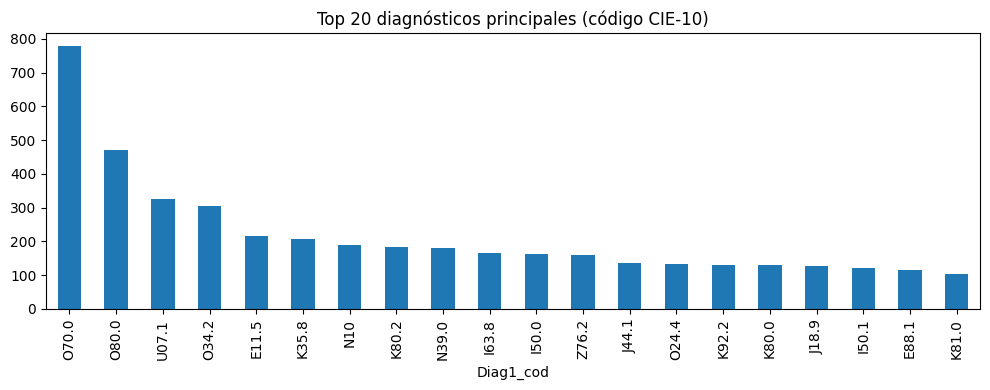

In [221]:
plt.figure(figsize=(10, 4))
df["Diag1_cod"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 diagnósticos principales (código CIE-10)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 7. Complejidad del episodio: n° de diagnósticos y procedimientos

### Contamos cuántos diagnósticos/procedimientos ≠ "-" tiene cada episodio

vamos a contar los diagnosticos y procedimientos para determinar una medida de complejidad del episodio, osea mientras mas diagnosticos es un paciente con mas comorbidilidades y mientras mas porocedimientos son episodios mas complejos

Cuántos diagnósticos ≠ "-" tiene comorbilidades.

Cuántos procedimientos ≠ "-" tiene complejidad terapéutica

In [222]:
df["n_diag"] = (df[diag_cols] != "-").sum(axis=1)
df["n_proc"] = (df[proc_cols] != "-").sum(axis=1)

promedio de diagnósticos/procedimientos,

rango, percentiles.

In [223]:
print("\n=== Diagnósticos por episodio ===")
print(df["n_diag"].describe())


=== Diagnósticos por episodio ===
count    14561.000000
mean         7.173958
std          5.220577
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         35.000000
Name: n_diag, dtype: float64


In [224]:
print("\n=== Procedimientos por episodio ===")
df["n_proc"].describe()


=== Procedimientos por episodio ===


,n_proc
count,14561.000000
mean,13.217499
std,7.362028
min,1.000000
25%,8.000000
50%,11.000000
75%,16.000000
max,30.000000


### Histogramas de n_diag y n_proc

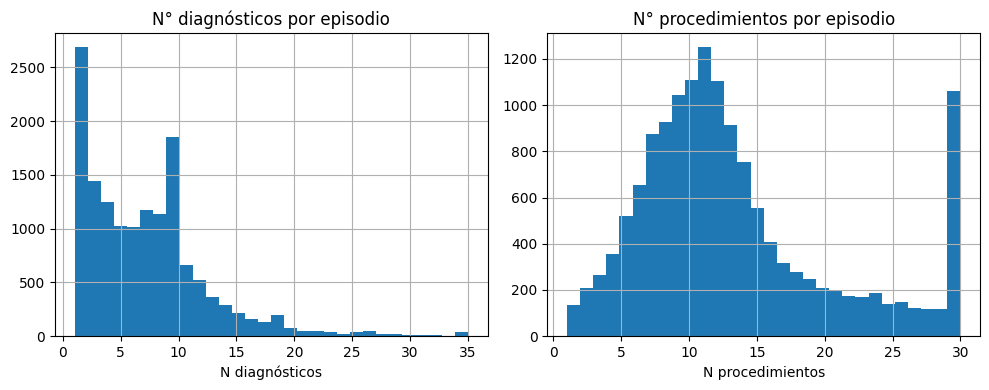

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df["n_diag"].hist(bins=30, ax=axes[0])
axes[0].set_title("N° diagnósticos por episodio")
axes[0].set_xlabel("N diagnósticos")

df["n_proc"].hist(bins=30, ax=axes[1])
axes[1].set_title("N° procedimientos por episodio")
axes[1].set_xlabel("N procedimientos")

plt.tight_layout()
plt.show()

## 7.1. Relación n_diag / n_proc / Edad correlaciones

Calcula la matriz de correlación entre edad, número de diagnósticos y número de procedimientos.

Se ve que edad se correlaciona moderadamente con n_diag y n_proc (pacientes más viejos tienden a tener más comorbilidades y procedimientos).

In [226]:
corr_vars = df[["Edad en años", "n_diag", "n_proc"]].corr()
print("\n=== Matriz de correlación  ===")
corr_vars



=== Matriz de correlación  ===


,Edad en años,n_diag,n_proc
Edad en años,1.000000,0.389404,0.417140
n_diag,0.389404,1.000000,0.632334
n_proc,0.417140,0.632334,1.000000


# 8. Costos FONASA por GRD

necesitamos normalizar para que los codigos calcen 1:1 entre el data set y el excel con la data de Fonasa.

In [227]:
# Separar código y descripción del GRD original
df["GRD_COD"] = df["GRD"].str.split(" - ", n=1, expand=True)[0]
df["GRD_DESC"] = df["GRD"].str.split(" - ", n=1, expand=True)[1]

# Ahora recién le haces zfill
df["GRD_COD"] = df["GRD_COD"].astype(str).str.zfill(6)


In [228]:
prices = pd.read_excel("IR-GRD V3.1 CON PRECIOS FONASA 2016.xlsx")

### Normalizamos código a 6 dígitos para que calce con GRD_COD

In [229]:
prices["IR-GRD CÓDIGO"] = prices["IR-GRD CÓDIGO"].astype(str).str.zfill(6)
df["GRD_COD"] = df["GRD_COD"].astype(str).str.zfill(6)

Juntamos, para que cada fila de episodio de hospitalizacion tenga su grd y el costo fonasa asociado, permitiendo asi ver la distribucion del costo de las hospitalizaciones

In [230]:
df = df.merge(
    prices[["IR-GRD CÓDIGO", "Precio FONASA 2016"]],
    left_on="GRD_COD",
    right_on="IR-GRD CÓDIGO",
    how="left"
)

Estadísticos del costo por hospitalización (media, mediana, máximo).



In [231]:
print("\n=== Estadísticos Precio FONASA 2016 por episodio ===")
df["Precio FONASA 2016"].describe()


=== Estadísticos Precio FONASA 2016 por episodio ===


,Precio FONASA 2016
count,1.456100e+04
mean,1.444065e+06
std,1.895825e+06
min,0.000000e+00
25%,6.978000e+05
50%,9.798000e+05
75%,1.549200e+06
max,2.004884e+07


### Histograma de precios

distribución muy sesgada, pocos  episodios extremadamente caros



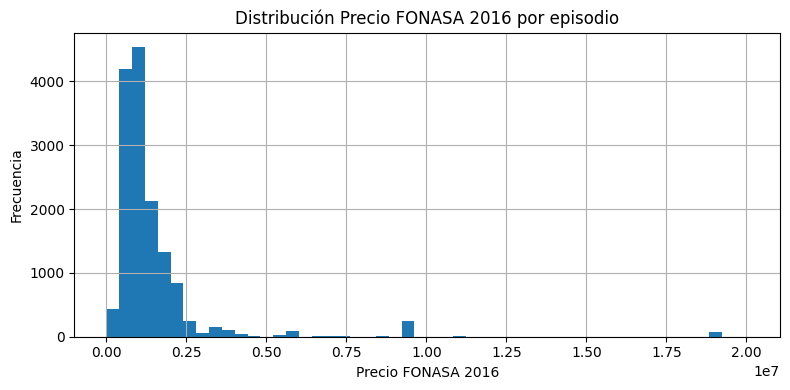

In [232]:
df["Precio FONASA 2016"].hist(bins=50)
plt.title("Distribución Precio FONASA 2016 por episodio")
plt.xlabel("Precio FONASA 2016")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### Tabla de los GRD más caros

onstruye una tabla única por GRD con su descripción y precio promedio.

Muestra el Top 10 GRD más caros, que suelen ser neonatos críticos, ECMO, grandes quemaduras....

In [233]:
grd_price = (
    df[["GRD_COD", "GRD_DESC", "Precio FONASA 2016"]]
    .drop_duplicates()
    .sort_values("Precio FONASA 2016", ascending=False)
)

In [234]:
print("\nTop 10 GRD más caros (FONASA 2016):")
grd_price.head(10)


Top 10 GRD más caros (FONASA 2016):


,GRD_COD,GRD_DESC,Precio FONASA 2016
921,158033,"PH NEONATO, PESO AL NACER <1000 GR SIN PROCEDIMIENTO MAYOR W/MCC",2.004884e+07
1,041013,PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON TRAQUEOSTOMÍA W/MCC,1.893578e+07
918,158113,"MH NEONATO, PESO AL NACER 1000-1499 GR SIN PROCEDIMIENTO MAYOR W/MCC",1.108185e+07
948,091203,PH INJERTO DE PIEL CON QUEMADURA W/MCC,1.022058e+07
4151,051113,PH INSERCIÓN DE DESFIBRILADOR CARDIACO Y SISTEMA DE ASISTENCIA CARDIACA W/MCC,9.523139e+06
3,041023,PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC,9.416848e+06
61,071103,PH PROCEDIMIENTOS SOBRE PÁNCREAS E HÍGADO W/MCC,8.517178e+06
917,158112,"MH NEONATO, PESO AL NACER 1000-1499 GR SIN PROCEDIMIENTO MAYOR W/CC",7.505550e+06
49,091303,PH INJERTO DE PIEL SIN QUEMADURA W/MCC,7.156106e+06
13798,174103,MH LEUCEMIA AGUDA W/MCC,6.813900e+06


## 8.1 Relación costo vs 'complejidad' (edad, n_diag, n_proc)

Correlaciona el precio FONASA con edad, n_diag, n_proc.

Muestra que hay relación positiva donde hay  más procedimientos/diagnósticos que tienden a tener mayores costos

In [235]:
corr_cost = df[["Edad en años", "n_diag", "n_proc", "Precio FONASA 2016"]].corr()
print("\n=== Matriz de correlación con Precio FONASA 2016 ===")
corr_cost


=== Matriz de correlación con Precio FONASA 2016 ===


,Edad en años,n_diag,n_proc,Precio FONASA 2016
Edad en años,1.000000,0.389404,0.417140,0.222504
n_diag,0.389404,1.000000,0.632334,0.440364
n_proc,0.417140,0.632334,1.000000,0.485854
Precio FONASA 2016,0.222504,0.440364,0.485854,1.000000


# 8.2. Resumen por GRD frecuencia + edad + complejidad + costo

Por cada GRD, calcula:

* número de episodios,

* edad promedio,

* n_diag promedio,

* n_proc promedio,

* precio promedio FONASA.

Sirve para describir los GRD más frecuentes con su complejidad y costo.

In [236]:
grd_summary = (
    df.groupby("GRD_COD")
      .agg(
          n_episodios=("GRD_COD", "size"),
          edad_prom=("Edad en años", "mean"),
          n_diag_prom=("n_diag", "mean"),
          n_proc_prom=("n_proc", "mean"),
          precio_prom=("Precio FONASA 2016", "mean")
      )
      .sort_values("n_episodios", ascending=False)
)

In [237]:
print("\nResumen por GRD :")
grd_summary.head(15)


Resumen por GRD :


,n_episodios,edad_prom,n_diag_prom,n_proc_prom,precio_prom
GRD_COD,,,,,
146101,813,29.666667,9.244772,11.836408,8.339865e+05
146121,639,27.344288,9.093897,12.297340,5.029804e+05
146131,538,27.513011,8.174721,11.317844,4.832430e+05
158171,389,0.000000,1.645244,4.069409,1.582500e+05
134161,325,28.440000,3.658462,7.836923,4.426500e+05
071141,317,46.495268,2.921136,10.413249,1.417049e+06
044153,287,64.606272,14.261324,19.397213,2.282850e+06
061131,252,34.119048,2.242063,11.579365,1.196864e+06
041023,248,57.842742,18.645161,29.564516,9.416848e+06


# 9. Preparación de datos para el modelo (Top-50 GRD)

sacamos los duplicados

In [238]:
df = df.drop_duplicates().copy()

Aseguramos que esten limpios nuevamente con zfill

In [239]:
df["GRD_COD"] = df["GRD"].str.split(" - ", n=1, expand=True)[0]
df["GRD_DESC"] = df["GRD"].str.split(" - ", n=1, expand=True)[1]
df["GRD_COD"] = df["GRD_COD"].astype(str).str.zfill(6)

In [240]:
df["Diag1_cod"] = df["Diag 01 Principal (cod+des)"].str.split(" - ", n=1, expand=True)[0]
df["Proced1_cod"] = df["Proced 01 Principal (cod+des)"].str.split(" - ", n=1, expand=True)[0]


In [241]:
diag_cols = [c for c in df.columns if c.startswith("Diag ")]
proc_cols = [c for c in df.columns if c.startswith("Proced ")]

In [242]:
df["n_diag"] = (df[diag_cols] != "-").sum(axis=1)
df["n_proc"] = (df[proc_cols] != "-").sum(axis=1)

In [243]:
print("GRD distintos totales:", df["GRD_COD"].nunique())

GRD distintos totales: 526


definimos en 20 el top N de GRD, ya que es una muestra muy aceptable segun los datos mostrados

In [244]:
TOP_N_GRD = 20
grd_counts = df["GRD_COD"].value_counts()
top_grd_codes = grd_counts.head(TOP_N_GRD).index

In [245]:
df_model = df[df["GRD_COD"].isin(top_grd_codes)].copy()
print("Shape df_model:", df_model.shape)
print("N GRD en df_model:", df_model["GRD_COD"].nunique())

Shape df_model: (5738, 78)
N GRD en df_model: 20


definimios el feature y el target

In [246]:
feature_cols = ["Edad en años", "Sexo (Desc)", "Diag1_cod", "Proced1_cod", "n_diag", "n_proc"]
target_col = "GRD_COD"

nos quedamos solo con los episodios cuyos GRD están dentro del Top-N más frecuentes, para tener suficiente data por clase.

Defines la matriz de entrada y la variable objetivo que va a predecir el modelo.

In [247]:
X = df_model[feature_cols].copy()
y = df_model[target_col].copy()

# Split estratificado

Divide en train/test (80/20) manteniendo la proporción de cada GRD en ambos sets.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [249]:
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (4590, 6) Test: (1148, 6)


# 10. Preprocesamiento con ColumnTransformer

In [250]:
cat_features = ["Sexo (Desc)", "Diag1_cod", "Proced1_cod"]
num_features = ["Edad en años", "n_diag", "n_proc"]

ColumnTransformer con:

* OneHotEncoder para categóricas.

* StandardScaler para numéricas.

In [251]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)

le hacemos fit y transform para aplicar

In [252]:
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc = preprocess.transform(X_test)

para pasar a matrices densas

In [253]:
X_train_dense = X_train_proc.toarray()
X_test_dense = X_test_proc.toarray()

In [254]:
X_train_dense.shape, X_test_dense.shape

((4590, 622), (1148, 622))

In [255]:
le_y = LabelEncoder()
y_train_int = le_y.fit_transform(y_train)
y_test_int = le_y.transform(y_test)
num_classes = len(le_y.classes_)
print("N clases:", num_classes)

N clases: 20


In [256]:
classes = np.unique(y_train_int)
class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train_int
)

Convierte variables categóricas a one-hot, que es lo que el MLP y los modelos clásicos esperan.

Estandariza numéricas

Codifica los GRD como enteros  para sparse_categorical_crossentropy.

Calcula pesos de clase inversamente proporcionales a la frecuencia, para que el modelo no se vaya solo a las clases más frecuentes.

In [257]:
class_weights = {int(c): float(w) for c, w in zip(classes, class_weights_array)}
class_weights

{0: 1.1590909090909092,
 1: 0.9978260869565218,
 2: 1.2540983606557377,
 3: 1.9956521739130435,
 4: 1.4079754601226995,
 5: 1.136138613861386,
 6: 1.8658536585365855,
 7: 0.9035433070866141,
 8: 1.2679558011049723,
 9: 1.2893258426966292,
 10: 2.0675675675675675,
 11: 0.8826923076923077,
 12: 0.35362095531587057,
 13: 1.176923076923077,
 14: 1.7653846153846153,
 15: 0.45088408644400785,
 16: 1.53,
 17: 0.5337209302325582,
 18: 2.049107142857143,
 19: 1.0576036866359446}

# 11. Modelo MLP en Keras

MLP clásico para clasificación tabular:

* Capas densas para aprender interacciones entre features.

* BatchNormalization estabiliza el entrenamiento.

* Dropout combate overfitting.

*softmax produce distribución de probabilidad sobre GRD.

In [258]:
input_dim = X_train_dense.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

* Adam es entrenamiento rápido y estable.

* EarlyStopping  evita sobreentrenar y “congelas” el mejor modelo.

* ReduceLROnPlateau  ayuda a refinar el mínimo.

In [259]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [260]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       159,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,500 (767.58 KB)

 Trainable params: 195,732 (764.58 KB)

 Non-trainable params: 768 (3.00 KB)

In [261]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [262]:
lr_plateau = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,
    min_lr=1e-5
)

Modelo:
* Usa 20% del train como validation.

* Hasta 100 épocas pero se corta antes por early stopping.

* Usa class_weight para compensar desbalance.

In [263]:
history = model.fit(
    X_train_dense,
    y_train_int,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_plateau],
    verbose=1
)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3116 - loss: 2.5448 - val_accuracy: 0.6383 - val_loss: 2.6208 - learning_rate: 0.0010
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6575 - loss: 0.8015 - val_accuracy: 0.6634 - val_loss: 2.3978 - learning_rate: 0.0010
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7751 - loss: 0.5027 - val_accuracy: 0.6362 - val_loss: 2.2551 - learning_rate: 0.0010
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7890 - loss: 0.4343 - val_accuracy: 0.6797 - val_loss: 2.1015 - learning_rate: 0.0010
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8104 - loss: 0.3548 - val_accuracy: 0.6906 - val_loss: 1.9740 - learning_rate: 0.0010
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8018 - loss: 0.3362 - val_accuracy: 0.6863 - val_loss: 1.8291 - learning_rate: 0.0010
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8230 - loss: 0.3065 - 

Test accuracy ≈ 0.81.

Precision, recall, F1 por GRD.

Se ve muy buena performance en clases frecuentes y recorta en las raras

In [264]:


# Evaluación en test
test_loss, test_acc = model.evaluate(X_test_dense, y_test_int, verbose=0)
print(f"Test accuracy (MLP): {test_acc:.3f}")

# Predicciones
y_pred_proba = model.predict(X_test_dense)
y_pred_int = y_pred_proba.argmax(axis=1)
y_pred_labels = le_y.inverse_transform(y_pred_int)

print("\nClassification report:")
print(classification_report(y_test, y_pred_labels))


Test accuracy (MLP): 0.814
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification report:
              precision    recall  f1-score   support

      041023       0.92      0.94      0.93        50
      044153       0.96      0.96      0.96        57
      044163       1.00      0.96      0.98        46
      044183       0.97      1.00      0.98        29
      054123       1.00      0.98      0.99        41
      061131       1.00      1.00      1.00        50
      061201       1.00      0.97      0.98        31
      071141       0.98      0.98      0.98        63
      131111       1.00      0.98      0.99        45
      131201       0.93      0.98      0.96        44
      131301       0.90      0.93      0.91        28
      134161       0.98      0.95      0.97        65
      146101       0.81      0.69      0.75       162
      146102       0.29      0.47      0.36        49
      146103       0.52      0.42      0.47        33
      146121       0.86      0.62      0.72  

In [265]:
price_lookup = (
    df[["GRD_COD", "Precio FONASA 2016"]]
    .drop_duplicates()
    .set_index("GRD_COD")["Precio FONASA 2016"]
)

Promedio de “plata que te equivocas” al clasificar mal un episodio.

Es mucho más interpretable para el hospital que solo accuracy.

In [266]:
def cost_error(y_true, y_pred, price_lookup):
    y_true = pd.Series(y_true).astype(str).str.zfill(6)
    y_pred = pd.Series(y_pred).astype(str).str.zfill(6)
    true_price = y_true.map(price_lookup)
    pred_price = y_pred.map(price_lookup)
    return (true_price - pred_price).abs().mean()

In [267]:
dl_cost = cost_error(y_test, y_pred_labels, price_lookup)
print(f"\nError económico promedio (MLP): ${dl_cost:,.0f}")


Error económico promedio (MLP): $1,457,875


  La pérdida de entrenamiento disminuye de manera sostenida y se estabiliza, lo cual indica que el modelo está aprendiendo patrones de los datos.

 - La pérdida de validación también disminuye rápidamente durante las primeras
   ~10 épocas, pero luego se aplana y deja de mejorar de forma significativa.

 - La brecha entre train_loss y val_loss indica un nivel moderado de overfitting,
   lo cual es esperable porque el problema tiene:
      * 50 clases (muchas),
      * fuerte desbalance entre GRD,
      * features categóricas muy dispersas.
- El hecho de que la val_loss NO diverja muestra que el modelo generaliza de forma aceptable.

En resumen el modelo aprende bien, llega a un punto estable, y el overfitting es moderado pero no crítico.

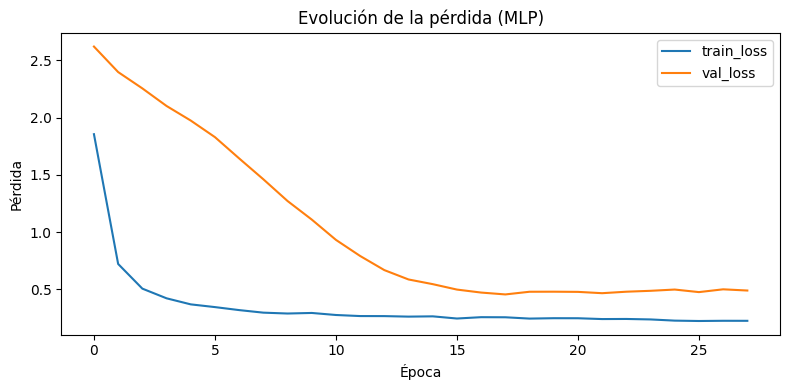

In [268]:
import matplotlib.pyplot as plt

# Curvas de entrenamiento
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida (MLP)")
plt.legend()
plt.tight_layout()
plt.show()

Este gráfico muestra cómo evoluciona la exactitud tanto en entrenamiento ¿
 como en el conjunto de validación.

 - El accuracy de entrenamiento sube rápido y llega a 0.84.
 - El accuracy de validación se estabiliza alrededor de 0.80 - 0.82.
 - La diferencia entre ambos indica un ligero overfitting.

 - Lo clave es que la validación NO cae después del peak: el modelo no está colapsando.


 El MLP converge de manera estable, mantiene accuracy de validación alto para un problema
 de 20 clases y alto desbalance, y no muestra un overfitting severo.

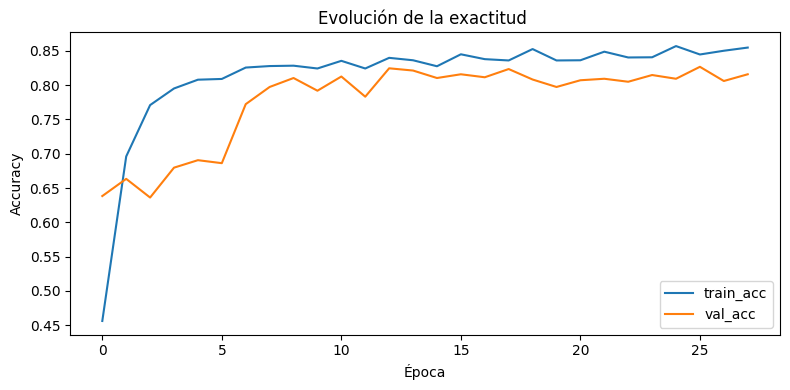

In [269]:
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Evolución de la exactitud ")
plt.legend()
plt.tight_layout()
plt.show()

In [270]:

labels_order = top_grd_codes  # mismo orden que usaste en el análisis
cm = confusion_matrix(y_test, y_pred_labels, labels=labels_order)

 Matriz de confusión (MLP, Top-50 GRD)
 La matriz de confusión permite ver en detalle cómo se comporta el modelo en cada GRD.

 Hallazgos principales:
 - La diagonal es fuerte: la mayoría de los GRD frecuentes son correctamente clasificados.
 - Los errores aparecen principalmente entre:
       * GRD clínicamente parecidos especialmente obstétricos 1461xx,
       * GRD con pocos casos naturalmente mas difíciles.

 - Esta visualizacion es clave para entender que:
       El modelo NO falla al azar, sino que falla en clases que son naturalmente ambiguas o escasas.

 La matriz confirma que el modelo captura bien la estructura del problema,
 pero aún tiene dificultades en GRD raros, coherente con su F1 macro.

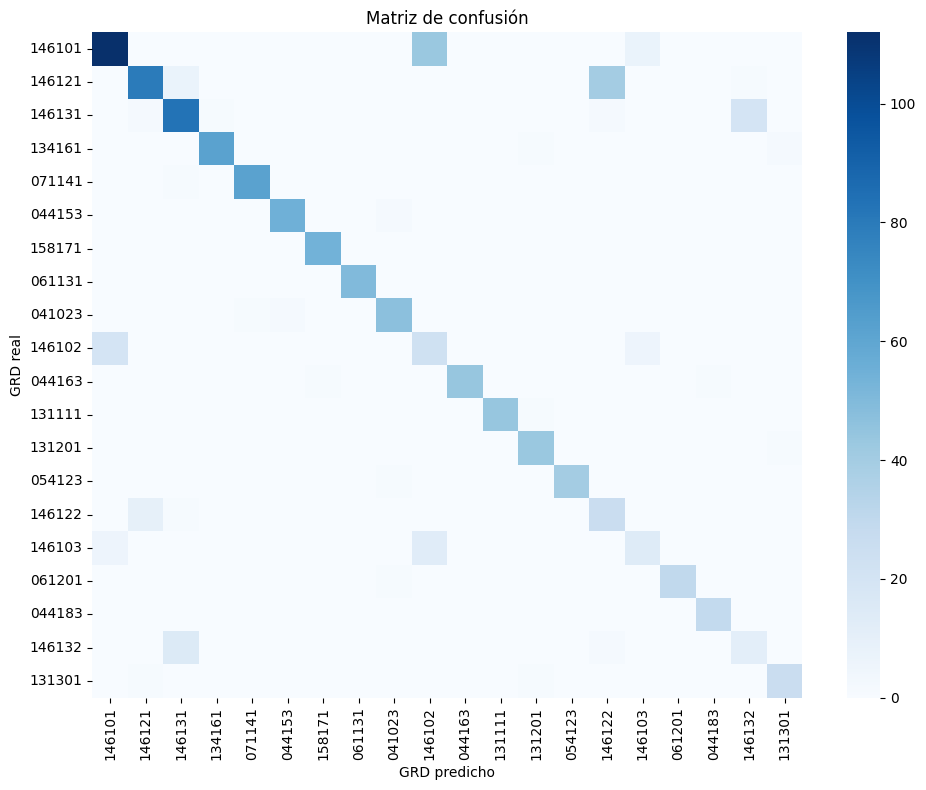

In [271]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap="Blues", xticklabels=labels_order, yticklabels=labels_order)
plt.xlabel("GRD predicho")
plt.ylabel("GRD real")
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# 12. Baselines clásicos: Regresión Logística y Random Forest


volvemos a definir cat features y num features y preprocess

In [272]:
cat_features = ["Sexo (Desc)", "Diag1_cod", "Proced1_cod"]
num_features = ["Edad en años", "n_diag", "n_proc"]

In [273]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)

con esta funcion hacemos lo siguiente:

- ajusta el modelo,

- calcula accuracy, F1 macro,

- calcula cost_error usando FONASA,

- imprime classification_report,

- retorna diccionario con métricas y predicciones.

con el fin de comparar el MLP vs modelos tradicionales usando el mismo preprocesamiento y las mismas métricas incluyendo costo económico

In [274]:
def evaluar_modelo(nombre, clf, X_train, y_train, X_test, y_test, price_lookup):
    """
    Entrena clf, evalúa en test y retorna dict con métricas.
    """
    print(f"\n===== Entrenando {nombre} =====")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    costo = cost_error(y_test, y_pred, price_lookup)

    print(f"\n[Métricas {nombre}]")
    print(f"Accuracy        : {acc:.3f}")
    print(f"F1 macro        : {f1_macro:.3f}")
    print(f"Error económico : ${costo:,.0f}")

    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    return {
        "modelo": nombre,
        "accuracy": acc,
        "f1_macro": f1_macro,
        "costo_promedio": costo,
        "y_pred": y_pred
    }

# Modelo 1: Regresión logística multinomial

Modelo lineal de referencia.

class_weight="balanced" para lidiar con desbalance.

In [275]:
log_reg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        n_jobs=-1,
        class_weight="balanced"
    ))
])

# Modelo 2: Random Forest

Modelo de árboles tipo ensemble: no lineal, robusto.

También con ajuste de pesos de clase.

In [276]:
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ))
])

# Entrenar y evaluar

Obtendremos lo siguiente:

- Accuracy y F1 macro para cada baseline.

- Error económico promedio de cada uno.

- Informes por clase precisión/recall/F1 por GRD

In [277]:
resultados = {}

In [278]:
res_log = evaluar_modelo(
    "Regresión Logística",
    log_reg_pipe,
    X_train, y_train,
    X_test, y_test,
    price_lookup
)
resultados["logreg"] = res_log


===== Entrenando Regresión Logística =====


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[Métricas Regresión Logística]
Accuracy        : 0.796
F1 macro        : 0.813
Error económico : $1,448,880

Classification report:
              precision    recall  f1-score   support

      041023       0.91      0.96      0.93        50
      044153       0.95      0.91      0.93        57
      044163       0.95      0.91      0.93        46
      044183       0.97      0.97      0.97        29
      054123       1.00      0.98      0.99        41
      061131       1.00      1.00      1.00        50
      061201       0.97      1.00      0.98        31
      071141       1.00      0.97      0.98        63
      131111       1.00      0.98      0.99        45
      131201       0.93      0.95      0.94        44
      131301       0.86      0.89      0.88        28
      134161       0.97      0.97      0.97        65
      146101       0.83      0.68      0.75       162
      146102       0.30      0.37      0.33        49
      146103       0.43      0.67      0.52        33
  

In [279]:
res_rf = evaluar_modelo(
    "Random Forest",
    rf_pipe,
    X_train, y_train,
    X_test, y_test,
    price_lookup
)
resultados["rf"] = res_rf


===== Entrenando Random Forest =====

[Métricas Random Forest]
Accuracy        : 0.825
F1 macro        : 0.797
Error económico : $1,450,621

Classification report:
              precision    recall  f1-score   support

      041023       0.92      0.98      0.95        50
      044153       0.96      0.89      0.93        57
      044163       0.91      0.91      0.91        46
      044183       0.97      0.97      0.97        29
      054123       1.00      0.98      0.99        41
      061131       1.00      1.00      1.00        50
      061201       0.97      1.00      0.98        31
      071141       0.98      0.97      0.98        63
      131111       1.00      0.98      0.99        45
      131201       0.91      0.95      0.93        44
      131301       0.96      0.82      0.88        28
      134161       0.93      0.98      0.96        65
      146101       0.75      0.90      0.82       162
      146102       0.33      0.18      0.24        49
      146103       0.50 

# 13. Comparación de modelos (LogReg, RF, MLP)

Genera una tabla resumen directamente usable como Tabla en el paper, comparando los tres modelos.

In [280]:
f1_mlp = f1_score(y_test_int, y_pred_int, average="macro")
acc_mlp = test_acc

In [281]:
resultados["mlp"] = {
    "modelo": "MLP",
    "accuracy": acc_mlp,
    "f1_macro": f1_mlp,
    "costo_promedio": dl_cost,
    "y_pred": y_pred_labels  # ojo: aquí son labels string, no ints
}

In [282]:
df_resultados = pd.DataFrame([
    {
        "Modelo": r["modelo"],
        "Accuracy": r["accuracy"],
        "F1 macro": r["f1_macro"],
        "Error económico prom.": r["costo_promedio"]
    }
    for r in resultados.values()
])

In [283]:

df_resultados

,Modelo,Accuracy,F1 macro,Error económico prom.
0,Regresión Logística,0.796167,0.813147,1.448880e+06
1,Random Forest,0.824913,0.797053,1.450621e+06
2,MLP,0.814460,0.827471,1.457875e+06


# 14. GRD con bajo desempeño MLP

Lista explícitamente los GRD donde el F1 del MLP es bajo (<0.40).

In [284]:
reporte_mlp = classification_report(
    y_test,
    y_pred_labels,
    output_dict=True
)

In [285]:
f1_por_grd_mlp = {
    label: metrics["f1-score"]
    for label, metrics in reporte_mlp.items()
    if label not in ["accuracy", "macro avg", "weighted avg"]
}

In [286]:
f1_mlp_series = pd.Series(f1_por_grd_mlp).sort_values()

El modelo anda bien en promedio,

Pero hay un subconjunto de GRD donde su desempeño es insuficiente clases de baja frecuencia, diagnósticos raros, etc.

In [287]:
grd_malos_mlp = f1_mlp_series[f1_mlp_series < 0.4]
print("GRD con F1 < 0.40 en MLP:")
grd_malos_mlp

GRD con F1 < 0.40 en MLP:


,0
146102,0.359375
146132,0.366667


# 15. GRD con bajo desempeño Random Forest

Que los baselines también fallan en esos GRD difíciles.

Por lo tanto, el problema no es solo el MLP, sino la dificultad intrínseca del dataset en esas clases.

In [288]:
reporte_rf = classification_report(
    y_test,
    resultados["rf"]["y_pred"],
    output_dict=True
)

In [289]:
f1_por_grd_rf = {
    label: metrics["f1-score"]
    for label, metrics in reporte_rf.items()
    if label not in ["accuracy", "macro avg", "weighted avg"]
}

In [290]:
f1_rf_series = pd.Series(f1_por_grd_rf).sort_values()

In [291]:
grd_malos_rf = f1_rf_series[f1_rf_series < 0.4]
print("GRD con F1 < 0.40 en Random Forest:")
grd_malos_rf

GRD con F1 < 0.40 en Random Forest:


,0
146102,0.236842
146132,0.238095
146122,0.268657
